 # Heart Disease Prediction
In this project with 11 features, the output of if the person has a Heart failure is given.
Using this data, we will build a model to predict the chances if a new person(sample) is likely to have
heart failure in future when their 11 common features are provided.

## The list of contents are as follows:
- Exploratory data analysis of the data
- Finding a suitable classifier to model the data
- Optimize the choosen classifier
- Build and save the data for use

### Data extraction and definition of 11 common features + Have or do not have heart failure
- Import data analysis and data visualization packages
- Import dataset into notebook
- Define the features in data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Attribute Information

    Age: age of the patient [years]
    Sex: sex of the patient [M: Male, F: Female]
    ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
    RestingBP: resting blood pressure [mm Hg]
    Cholesterol: serum cholesterol [mm/dl]
    FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
    RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
    MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
    ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
    Oldpeak: oldpeak = ST [Numeric value measured in depression]
    ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
    HeartDisease: output class [1: heart disease, 0: Normal]


In [2]:
df = pd.read_csv("heart.csv")

In [6]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Overview of dataset
- Plot pairplot to have a overview understanding of the data
- Coefficient heatmap of data is visualise relationship of the features
- Learn about the data types of the features and check for any Null values in the dataset

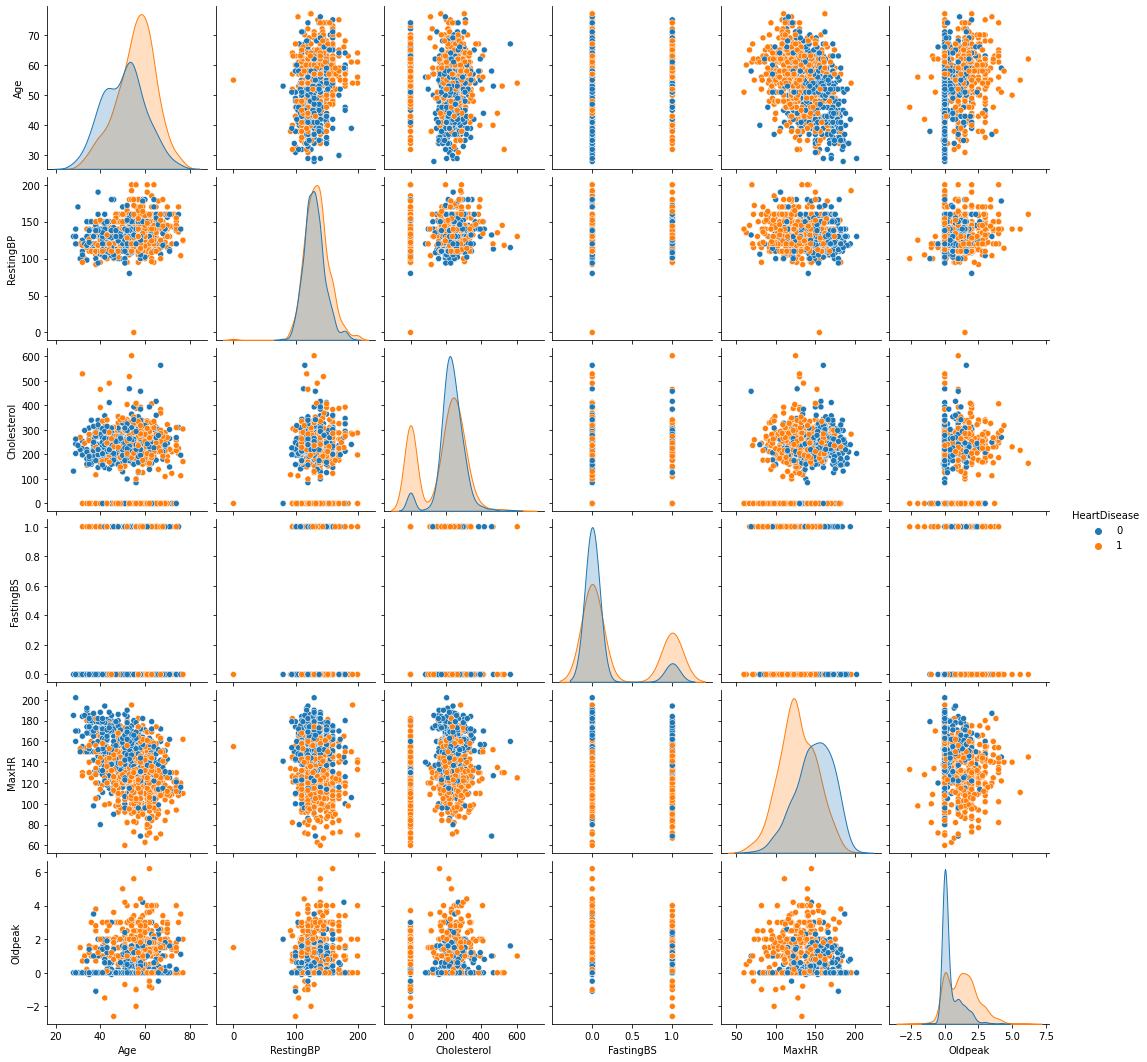

In [4]:
sns.pairplot(df, hue="HeartDisease")

<AxesSubplot:>

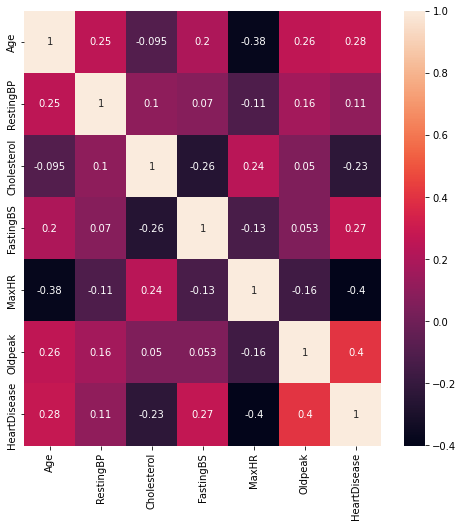

In [5]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8,8)) 
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, annot=True, ax=ax)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [70]:
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

- *The output(Heart failure) is not skewed. Hence, we will be using accuracy score as a judging criteria for the classifiers.*

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

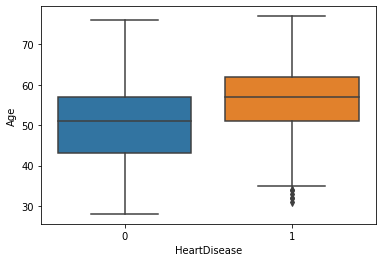

In [8]:
# Age: age of the patient [years]
sns.boxplot(data = df, y = "Age", x = "HeartDisease")

- *People who are heart disease tend to be older, with a median age of about 58. Risk of getting heart disease increases with age. Age is a useful feature to predict if one has heart disease.*

129

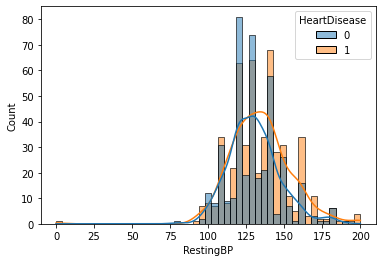

In [42]:
# RestingBP: resting blood pressure [mm Hg]
res = sns.histplot(data=df, x = "RestingBP" , hue= "HeartDisease", kde=True)
# Peak of Kde plot for people without heart disease.
kdeline = res.lines[1]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
round(xs[mode_idx])

- *People with heart disease tend to have a slightly higher blood pressure. 
   This feature will be used for modelling, if the effects of the feature is not impactfully. It's coefficient can    be zeroize by L1 regularization.* 
- *129mm Hg is assume to be the optimal blood pressure to have based on the data set.*

<AxesSubplot:xlabel='Sex', ylabel='Count'>

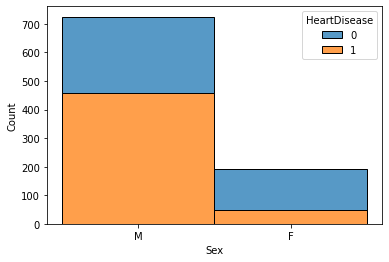

In [10]:
# Sex: sex of the patient [M: Male, F: Female]
sns.histplot(data=df, x="Sex", hue="HeartDisease", multiple="stack")

In [36]:
(df.groupby("Sex")["HeartDisease"].value_counts()/df.groupby("Sex")["HeartDisease"].count())*100

Sex  HeartDisease
F    0               74.093264
     1               25.906736
M    1               63.172414
     0               36.827586
Name: HeartDisease, dtype: float64

- *Males (63.2%) have a higher proportion of having heart disease compared to females (25.9%). 
   From the table above, male dataset forms the majority of the samples.*

<AxesSubplot:xlabel='ChestPainType', ylabel='Count'>

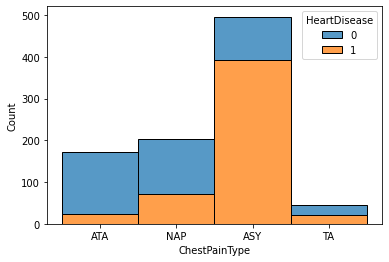

In [11]:
# ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
sns.histplot(data=df, x="ChestPainType", hue="HeartDisease", multiple="stack")

In [37]:
(df.groupby("ChestPainType")["HeartDisease"].value_counts()/df.groupby("ChestPainType")["HeartDisease"].count())*100

ChestPainType  HeartDisease
ASY            1               79.032258
               0               20.967742
ATA            0               86.127168
               1               13.872832
NAP            0               64.532020
               1               35.467980
TA             0               56.521739
               1               43.478261
Name: HeartDisease, dtype: float64

- *People with Asymptomatic chest pain (79%) are more likely to have heart disease followed by Typical Angina (43%) then Non-Anginal Pain (35%) and lastly Atypical Angina (14%).*

221

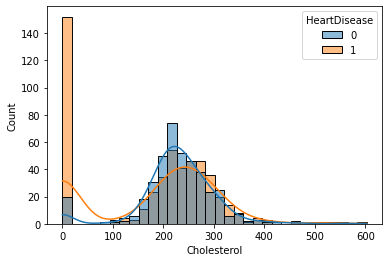

In [45]:
# Cholesterol: serum cholesterol [mm/dl]
cho = sns.histplot(data=df, x = "Cholesterol" , hue= "HeartDisease", kde=True)
# Peak of Kde plot for people without heart disease.
kdeline = cho.lines[1]
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
mode_idx = np.argmax(ys)
round(xs[mode_idx])

- *People with higher or very low cholesterol is more likely to have heart disease.
   (Assume cholesterol of 0 is possible)*
- *221mm/dl is assume to be the optimal cholesterol to have based on the data set.*

<AxesSubplot:xlabel='FastingBS', ylabel='Count'>

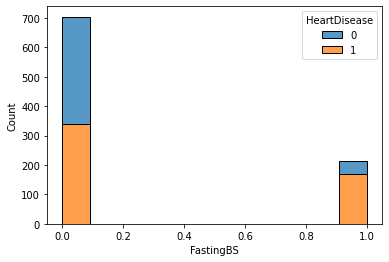

In [13]:
# fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
sns.histplot(data=df, x="FastingBS", hue="HeartDisease", multiple="stack")

In [35]:
(df.groupby("FastingBS")["HeartDisease"].value_counts()/df.groupby("FastingBS")["HeartDisease"].count())*100

FastingBS  HeartDisease
0          0               51.988636
           1               48.011364
1          1               79.439252
           0               20.560748
Name: HeartDisease, dtype: float64

- *People with high fasting blood sugar (79.4%) is more likely to have heart disease compared to people with low fasting blood suger (48%).*

<AxesSubplot:xlabel='RestingECG', ylabel='Count'>

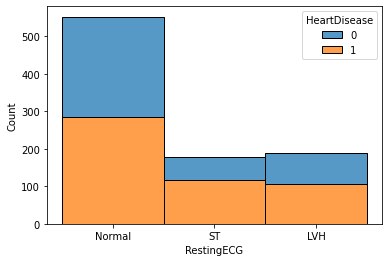

In [14]:
# resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or 
# ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by 
# Estes' criteria]
                                                                            
sns.histplot(data=df, x="RestingECG", hue="HeartDisease", multiple="stack")

In [38]:
(df.groupby("RestingECG")["HeartDisease"].value_counts()/df.groupby("RestingECG")["HeartDisease"].count())*100

RestingECG  HeartDisease
LVH         1               56.382979
            0               43.617021
Normal      1               51.630435
            0               48.369565
ST          1               65.730337
            0               34.269663
Name: HeartDisease, dtype: float64

- *People with ST-T wave abnormality (65.7%) have higher rates of heart diseases followed by those with left ventricular hypertrophy (56.4%) then those with normal electrocardiogram results (51.6%).*

<AxesSubplot:xlabel='HeartDisease', ylabel='MaxHR'>

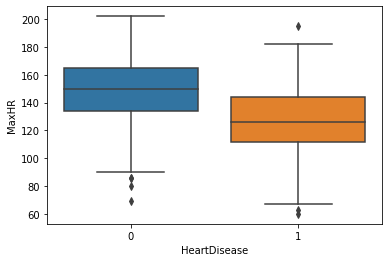

In [15]:
# Maximum heart rate achieved [Numeric value between 60 and 202]
sns.boxplot(data=df, y = "MaxHR" , x= "HeartDisease")

- *People with no heart disease tend to have a higher maximum heart rate.*

<AxesSubplot:xlabel='ExerciseAngina', ylabel='Count'>

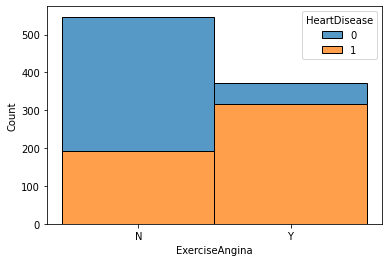

In [16]:
# ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
sns.histplot(data=df, x="ExerciseAngina", hue="HeartDisease", multiple="stack")

In [39]:
(df.groupby("ExerciseAngina")["HeartDisease"].value_counts()/df.groupby("ExerciseAngina")["HeartDisease"].count())*100

ExerciseAngina  HeartDisease
N               0               64.899452
                1               35.100548
Y               1               85.175202
                0               14.824798
Name: HeartDisease, dtype: float64

- *People that have exercise angina(85%) tend to have higher rates of heart disease compared to those without exercise angina (35%).*

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

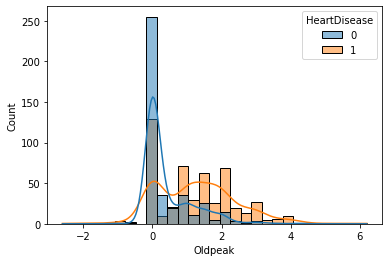

In [7]:
# Oldpeak: oldpeak = ST [Numeric value measured in depression]
sns.histplot(data=df, x="Oldpeak", hue="HeartDisease", kde=True)

- *People without heart disease tend to have a lower old peak.*

<AxesSubplot:xlabel='ST_Slope', ylabel='Count'>

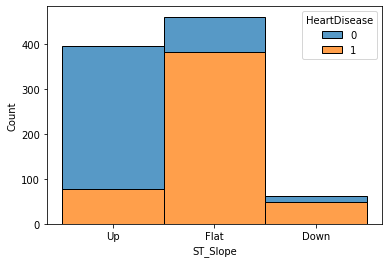

In [18]:
# ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
sns.histplot(data=df, x="ST_Slope", hue="HeartDisease", multiple="stack")

In [40]:
(df.groupby("ST_Slope")["HeartDisease"].value_counts()/df.groupby("ST_Slope")["HeartDisease"].count())*100

ST_Slope  HeartDisease
Down      1               77.777778
          0               22.222222
Flat      1               82.826087
          0               17.173913
Up        0               80.253165
          1               19.746835
Name: HeartDisease, dtype: float64

- *People with upsloping ST segment (80%) tend to have lower rates of heart disease compared to those with flat (17%) or downsloping ST segment (22%).*

In [8]:
# Import necessary packages for machine learning.
from numpy import mean, std
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn import metrics
import xgboost as xgb

The following is the feature engineering done to the dataset:
1. Change male to 1 and female to 0 for the "Sex" variable.
2. Change Y to 1 and N to 0 for the "ExerciseAngina" variable.
3. Perform get_dummies function on categorical variables "ChestPainType", "RestingECG" and "ST_Slope".
4. Split output variable, "HeartDisease" from the rest of the variables.

In [9]:
df.replace({"Sex":{"M" : 1, "F" : 0}}, inplace=True)
df.replace({"ExerciseAngina":{"Y" : 1, "N" : 0}}, inplace=True)

In [10]:
X = pd.get_dummies(df, columns={"ChestPainType", "RestingECG", "ST_Slope"})

In [11]:
y = X.pop("HeartDisease")

### Machine learning algorithm
The following algorithm tested are as follows:
- Logistic Regression
- Random Forest
- K-Means
- Support Vector Machines
- Gaussian Naive Bayes
- XGBoost

In order to select the best machine learning algorithm, the accuracy score of each algorithm can be compared and the algorithm with the highest accuracy score will be selected as the final model.
To obtain a reliable accuracy score of the algorithm, 10-fold cross validation will be implemented for the testing of the algorithm. Cross-validation will help in averaging out the variance of the accuuracy score output due to the variance in the data. The accuracy of the final model will be optimized through fine tuning of the hyperparameters.

As logistic regression and support vector machine has distance-based cost function and k-neighbour means is custered based on the distance between the sample points, these algorithm are sensitive to magnitude of the variables. Therefore, when implementing these algorithm it will be better to scale the variable to similar magnitude for the algorithm to converge faster. Thus, resulting in a better output. For more details: see the link below:
https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35

The training and testing data cannot be scaled together because this will lead to data leakage as the mean and variance of the scaling of the training data will be done using information from the testing data. Pipeline has been created for the scaling where the using of the training data uses information from the training data only. For more details, check out this link:https://www.kaggle.com/kaanboke/how-to-prevent-the-data-leakage

In [14]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [25]:
# Logistic Regression
logreg = make_pipeline(StandardScaler(), LogisticRegression())
logreg.fit(X, y)
logreg_pred=logreg.predict(X)
base_logreg = round((metrics.accuracy_score(y, logreg_pred.round(0).astype(int))) * 100, 2)
print('Logistic Regression training score is ' + str(base_logreg) + '%')      
acc_logreg = cross_val_score(logreg, X, y, scoring='accuracy', cv=cv, n_jobs=-1) 
acc_logreg_mean = round((mean(acc_logreg)*100),2)
acc_logreg_std = round((std(acc_logreg)*100),2)
print('Logistic Regression test score is ' + str(acc_logreg_mean) + '% (' + str(acc_logreg_std) + ')')   

Logistic Regression training score is 87.25%
Logistic Regression test score is 85.62% (4.66)


In [26]:
# Random Forest
rf = RandomForestClassifier(n_estimators=30, min_samples_leaf=20)
rf.fit(X, y)
rf_pred=rf.predict(X)
base_rf = round((metrics.accuracy_score(y, rf_pred.round(0).astype(int))) * 100, 2)
print('Random Forest classifier training score is ' + str(base_rf) + '%')      
acc_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_rf_mean = round((mean(acc_rf)*100),2)
acc_rf_std = round((std(acc_rf)*100),2)
print('Random Forest classifier test score is ' + str(acc_rf_mean) + '% (' + str(acc_rf_std) + ')')   

Random Forest classifier training score is 87.8%
Random Forest classifier test score is 85.62% (3.69)


In [27]:
# K-Means
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 11))
knn.fit(X, y)
knn_pred=knn.predict(X)
base_knn = round((metrics.accuracy_score(y, knn_pred.round(0).astype(int))) * 100, 2)
print('K-neighbours classifier training score is ' + str(base_knn) + '%')      
acc_knn = cross_val_score(knn, X, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_knn_mean = round((mean(acc_knn)*100),2)
acc_knn_std = round((std(acc_knn)*100),2)
print('K-neighbours classifier test score is ' + str(acc_knn_mean) + '% (' + str(acc_knn_std) + ')')   

K-neighbours classifier training score is 87.91%
K-neighbours classifier test score is 85.72% (2.97)


In [34]:
# Support Vector Machines
svc = make_pipeline(StandardScaler(), SVC())
svc.fit(X, y)
svc_pred=svc.predict(X)
base_svc = round((metrics.accuracy_score(y, svc_pred.round(0).astype(int))) * 100, 2)
print('Support Vector Machines training score is ' + str(base_svc) + '%')      
acc_svc = cross_val_score(svc, X, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_svc_mean = round((mean(acc_svc)*100),2)
acc_svc_std = round((std(acc_svc)*100),2)
print('Support Vector Machines test score is ' + str(acc_svc_mean) + '% (' + str(acc_svc_std) + ')')  

Support Vector Machines training score is 91.72%
Support Vector Machines test score is 86.05% (4.45)


In [29]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X, y)
gaussian_pred=gaussian.predict(X)
base_gaussian = round((metrics.accuracy_score(y, gaussian_pred.round(0).astype(int))) * 100, 2)
print('Gaussian Naive Bayes training score is ' + str(base_gaussian) + '%')      
acc_gaussian = cross_val_score(gaussian, X, y, scoring='accuracy', cv=cv, n_jobs=-1)  
acc_gaussian_mean = round((mean(acc_gaussian)*100),2)
acc_gaussian_std = round((std(acc_gaussian)*100),2)
print('Gaussian Naive Bayes test score is ' + str(acc_gaussian_mean) + '% (' + str(acc_gaussian_std) + ')')  

Gaussian Naive Bayes training score is 86.17%
Gaussian Naive Bayes test score is 85.4% (2.98)


In [30]:
# XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=40, max_depth=7, learning_rate=0.1, subsample=0.5, eval_metric="logloss", 
                            reg_lambda = 8, reg_alpha = 1)

xgb_clf.fit(X, y)
xgb_pred=xgb_clf.predict(X)
base_xgb = round((metrics.accuracy_score(y, xgb_pred.round(0).astype(int))) * 100, 2)
print('XGBoost classifier training score is ' + str(base_xgb) + '%')      
acc_xgb = cross_val_score(xgb_clf, X, y, scoring='accuracy', cv=cv)  
acc_xgb_mean = round((mean(acc_xgb)*100),2)
acc_xgb_std = round((std(acc_xgb)*100),2)
print('XGBoost classifier test score is ' + str(acc_xgb_mean) + '% (' + str(acc_xgb_std) + ')')    

XGBoost classifier training score is 90.52%
XGBoost classifier test score is 86.81% (3.12)


In [35]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'XGBoost'],
    'Score_training': [base_svc, base_knn, base_logreg, 
              base_rf, base_gaussian, base_xgb],
    'Score_mean': [acc_svc_mean, acc_knn_mean, acc_logreg_mean, 
              acc_rf_mean, acc_gaussian_mean, acc_xgb_mean],
    'Score_std': [acc_svc_std, acc_knn_std, acc_logreg_std, 
              acc_rf_std, acc_gaussian_std, acc_xgb_std]})

models.sort_values(by='Score_mean', ascending=False)

,Model,Score_training,Score_mean,Score_std
5,XGBoost,90.52,86.81,3.12
0,Support Vector Machines,91.72,86.05,4.45
1,KNN,87.91,85.72,2.97
2,Logistic Regression,87.25,85.62,4.66
3,Random Forest,87.80,85.62,3.69
4,Naive Bayes,86.17,85.40,2.98


**XBGoost** is choosen as the final model as it has the highest accuracy score as seen above.

The following are the parameters that will be fine-tuned for the model:
- n_estimators
- max_depth
- reg_lambda
- reg_alpha

Random search grid will be applied first to locate the rough region of the optimized model. Then, when the region is narrowed down to a smaller region, search grid will be done where all the combination of parameters will be tested to fine-tune the model. The number of folds for cross validation is reduce to save time.

In [24]:
# XGBoost optimization
import time
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
xgb_op = xgb.XGBClassifier(eval_metric="logloss", learning_rate=0.1, subsample=0.5, 
                            use_label_encoder =False)
n_estimators = [30, 50, 70, 90, 110]
max_depth=[2,4,6,8,10]
reg_lambda = [2,4,6,8] 
reg_alpha = [0.1, 0.3, 0.5, 0.7]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, reg_lambda=reg_lambda, reg_alpha=reg_alpha)

In [26]:
start_time = time.time()
grid = RandomizedSearchCV(estimator=xgb_op, param_distributions=param_grid, cv = 3, n_jobs=-1, scoring="accuracy",
                         n_iter = 30)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)/60) + ' min')

Best: 0.844227 using {'reg_lambda': 2, 'reg_alpha': 0.3, 'n_estimators': 70, 'max_depth': 4}
Execution time: 8.081570247809092 min


In [27]:
n_estimators = [50, 60, 70, 80, 90]
max_depth = [ 2 , 3, 4, 5, 6]
reg_lambda = [1, 1.5, 2, 2.5, 3] 
reg_alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, reg_lambda=reg_lambda, reg_alpha=reg_alpha)

In [28]:
start_time = time.time()
grid = RandomizedSearchCV(estimator=xgb_op, param_distributions=param_grid, cv = 3, n_jobs=-1, scoring="accuracy",
                         n_iter = 30)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)/60) + ' min')

Best: 0.849673 using {'reg_lambda': 1.5, 'reg_alpha': 0.4, 'n_estimators': 80, 'max_depth': 3}
Execution time: 8.455622843901317 min


In [45]:
n_estimators = [70, 75, 80]
max_depth = [2, 3, 4]
reg_lambda = [2, 4, 6] 
reg_alpha = [0.3, 0.4, 0.5]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, reg_lambda=reg_lambda, reg_alpha=reg_alpha)

In [46]:
start_time = time.time()
grid = RandomizedSearchCV(estimator=xgb_op, param_distributions=param_grid, cv = 5, n_jobs=-1, scoring="accuracy",
                         n_iter = 20)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)/60) + ' min')

Best: 0.839813 using {'reg_lambda': 4, 'reg_alpha': 0.5, 'n_estimators': 75, 'max_depth': 4}
Execution time: 8.146154228846232 min


In [55]:
n_estimators = [80]
max_depth = [3, 4]
reg_lambda = [4, 5, 6] 
reg_alpha = [0.45, 0.5, 0.55]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, reg_lambda=reg_lambda, reg_alpha=reg_alpha)

In [56]:
start_time = time.time()
grid = GridSearchCV(estimator=xgb_op, param_grid=param_grid, cv = 10, n_jobs=-1)
grid_result = grid.fit(X, y)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)/60) + ' min')

Best: 0.861491 using {'max_depth': 4, 'n_estimators': 80, 'reg_alpha': 0.5, 'reg_lambda': 6}
Execution time: 18.375059155623116 min


In [59]:
# XGBoost
xgb_clf = xgb.XGBClassifier(n_estimators=80, max_depth=4, learning_rate=0.1, subsample=0.5, eval_metric="logloss", 
                            reg_lambda = 6, reg_alpha = 0.5)
xgb_clf.fit(X, y)
xgb_pred=xgb_clf.predict(X)
base_xgb = round((metrics.accuracy_score(y, xgb_pred.round(0).astype(int))) * 100, 2)
print('XGBoost classifier training score is ' + str(base_xgb) + '%')      
acc_xgb = cross_val_score(xgb_clf, X, y, scoring='accuracy', cv=cv)  
acc_xgb_mean = round((mean(acc_xgb)*100),2)
acc_xgb_std = round((std(acc_xgb)*100),2)
print('XGBoost classifier test score is ' + str(acc_xgb_mean) + '% (' + str(acc_xgb_std) + ')') 

XGBoost classifier training score is 92.27%
XGBoost classifier test score is 87.69% (2.97)


After fine tuning the parameters, we obtain an accuracy score of 87.69% for XGBoost. This model will be save as "model.bin" for predicting chances of heart disease in new samples. As the model will be used on new samples, onehotencoder is used instead of get_dummies when building the final model.

In [11]:
from sklearn.compose import ColumnTransformer
def transform(data):
    df = pd.DataFrame.from_dict(data)
    df.replace({"Sex":{"M" : 1, "F" : 0}}, inplace=True)
    df.replace({"ExerciseAngina":{"Y" : 1, "N" : 0}}, inplace=True)
    return df

def model_output(df, y):
    cat_vars = ["ChestPainType", "RestingECG", "ST_Slope"]
    onehot_pipeline = ColumnTransformer([('categorical', OneHotEncoder(), cat_vars)])
    xgb_final = xgb.XGBClassifier(n_estimators=80, max_depth=4, learning_rate=0.1, subsample=0.5, eval_metric="logloss", 
                                reg_lambda = 6, reg_alpha = 0.5)
    chain = make_pipeline(onehot_pipeline, xgb_final)    
    final_model = chain.fit(df, y)
    return final_model

def predict_health(data, model):
    trans_data = transform(data)
    out = model.predict_proba(trans_data)
    return 
        

In [7]:
health = {'Age':[3, 50],
          'Sex':["M", "M"],
          'ChestPainType':["ATA", "ASY"],
          'RestingBP':[130, 150],
          'Cholesterol':[180, 180], 
          'FastingBS':[0, 1], 
          'RestingECG':["Normal", "LVH"], 
          'MaxHR':[140, 120], 
          'ExerciseAngina':["N", "Y"],
          'Oldpeak':[1.0, 1.5], 
          'ST_Slope':["Up", "Down"], 
         }
final_model = model_output(df, y)

In [5]:
#save the model using pickle
import pickle

In [66]:
with open("model.bin", 'wb') as f_out:
    pickle.dump(final_model, f_out)
    f_out.close()

In [18]:
with open("model.bin", 'rb') as f_in:
    model = pickle.load(f_in)
    
# predict output using model
test = predict_health(health, model)
test[1]

array([0.09212393, 0.9078761 ], dtype=float32)

From the output above, first sample has a low chance of heart disease while the second sample as a high chance of heart disease.

# THE END